#### Imporation des librairies 
##### 1- imporation des données dans une dataframe
##### 1-2 Analysez et visualisez l'ensemble de données

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#imporation des données 
adult = pd.read_csv("Data/adult.csv")

In [3]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
#La taille de la dataframe
print("Nombre d'observation :",adult.shape[0], "\nNombre de variables", adult.shape[1])

Nombre d'observation : 48842 
Nombre de variables 15


In [5]:
def categorical_col(data):
    return list(data.select_dtypes(include="object").columns)
def numeric_col(data):
    return list(data.select_dtypes(exclude="object").columns)

In [6]:
#Affichage des colonnes catégorielles
print("Les colonnes catégorielles")
categorCol = categorical_col(adult)
categorCol

Les colonnes catégorielles


['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [7]:
#Affichage des colonnes numériques
print("Les colonnes numériques")
numCol = numeric_col(adult)
numCol

Les colonnes numériques


['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [8]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
#La nombre des lignes dupliquées
adult.duplicated().sum()

52

In [11]:
#Suppression les lignes dupliquées
adult.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
#suppression de la colonne fnlwgt et créer une copy de la data 
df = adult.drop(["fnlwgt","native-country"],axis=1).copy()

In [13]:
df.pivot_table(index="education" ,values="income", aggfunc="count")

,income
education,
10th,1389
11th,1812
12th,657
1st-4th,247
5th-6th,509
7th-8th,955
9th,756
Assoc-acdm,1601
Assoc-voc,2061


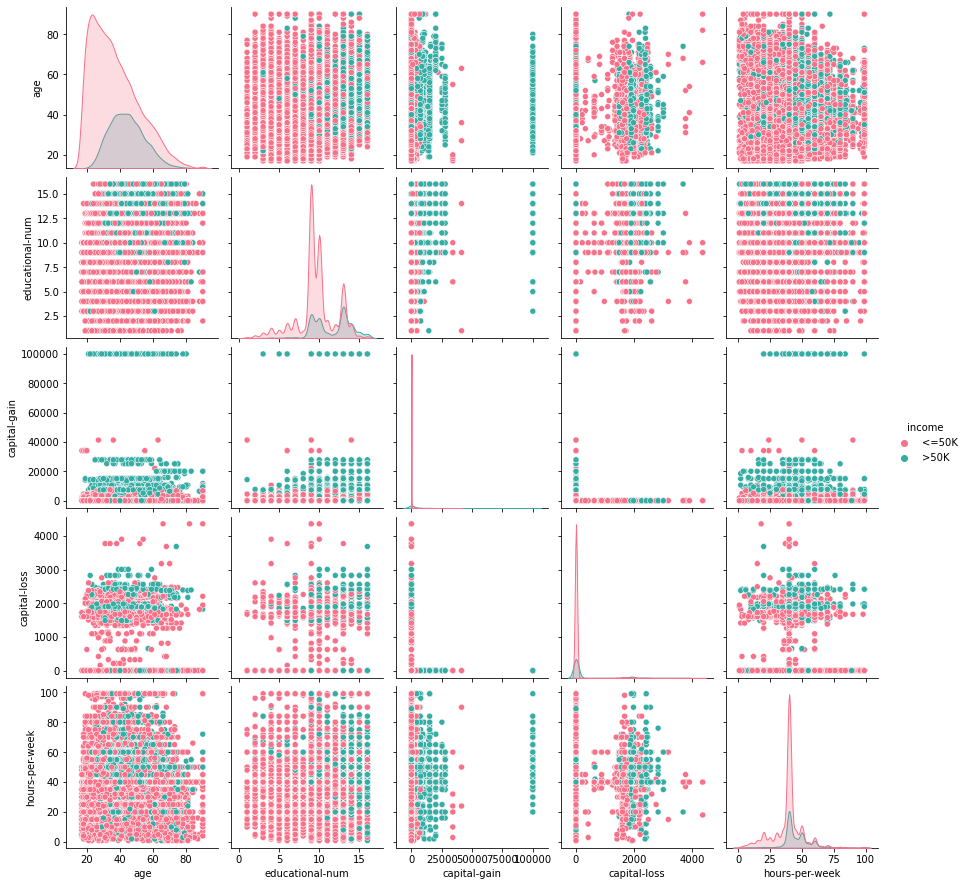

In [14]:
sns.pairplot(df, hue="income", palette='husl');

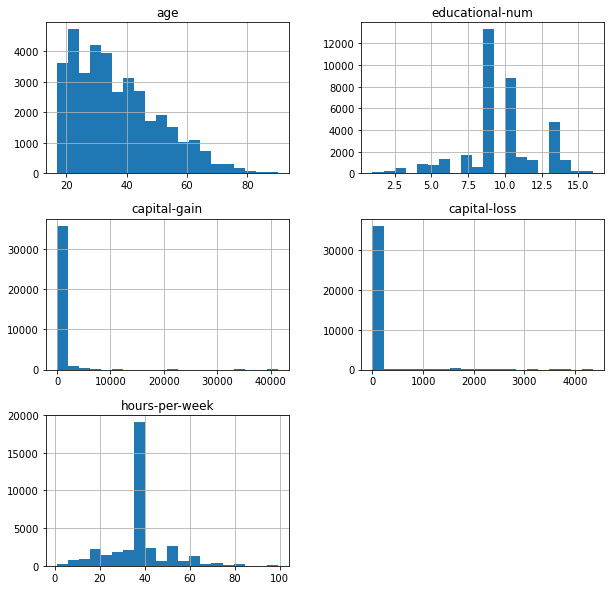

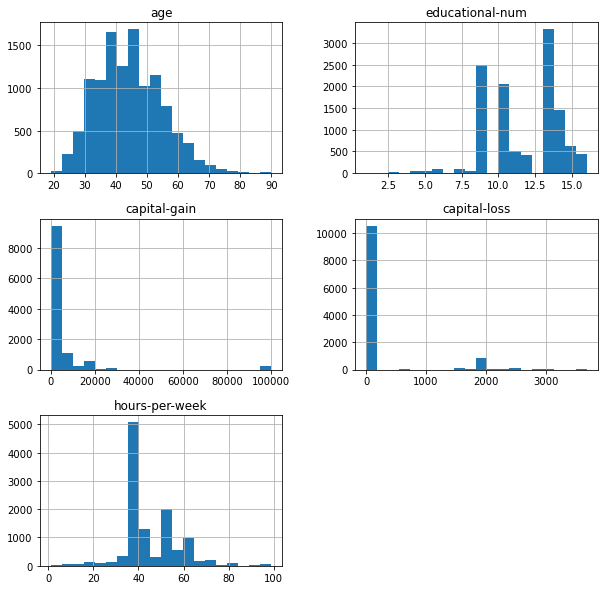

In [15]:
df.groupby('income').hist(bins=20,figsize=(10, 10));

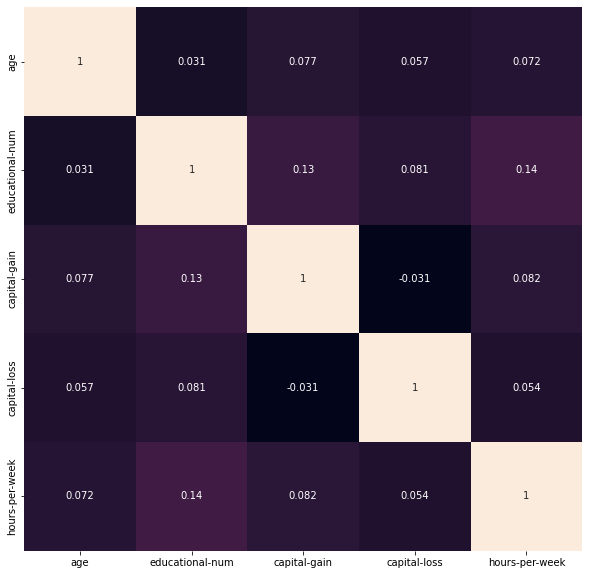

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cbar=False);

In [14]:
capital = df[["capital-gain","income"]][df["capital-gain"] == 0]
print(f"""Les gens qui n'ont pas de capital avec un salaire <= 50K: {capital["income"].value_counts()[0]}
Les gens qui n'ont pas de capital avec un salaire > 50K:   {capital["income"].value_counts()[1]} """)

Les gens qui n'ont pas de capital avec un salaire <= 50K: 35611
Les gens qui n'ont pas de capital avec un salaire > 50K:   9196 


**Explorer les variables continues**
>La variable Age a une large gamme et variabilité. La distribution et la moyenne sont très différentes pour le niveau de revenu 50K, ce qui implique que « l'âge » sera un bon prédicteur du « niveau de revenu ».


In [15]:
revenuEndessous50K = df["income"] == "<=50K"
revenuAudessus50K = df["income"] == ">50K"

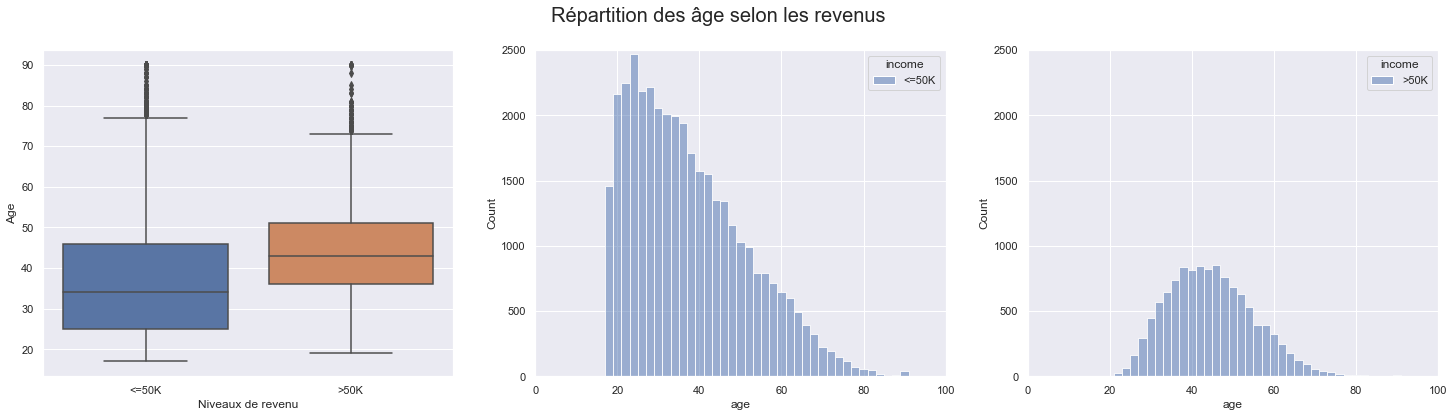

In [171]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(25,6))
fig.suptitle("Répartition des âge selon les revenus",fontsize=20)
sns.set(style="darkgrid")
ax1= plt.subplot(1,3, 1)
ax1 = sns.boxplot(data=df, x="income",y="age")
ax1.set_xlabel("Niveaux de revenu")
ax1.set_ylabel("Age")
ax2= plt.subplot(1,3, 2)
ax2.set_xlim(0,100)
ax2.set_ylim(0,2500)
ax2 = sns.histplot(data=df[revenuEndessous50K], x="age",hue="income", 
                   binwidth=2,legend=True)
ax3 = plt.subplot(1,3, 3)
ax3.set_xlim(0,100)
ax3.set_ylim(0,2500)
ax3 = sns.histplot(data=df[revenuAudessus50K], x="age",hue="income", 
                   binwidth=2);


    
    
    


In [17]:
df.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

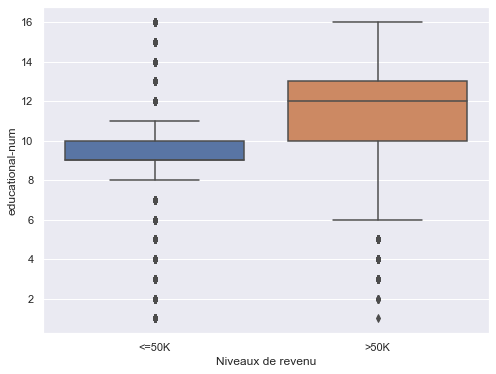

In [18]:
plt.figure(figsize=(8,6))

sns.set(style="darkgrid")
sns.boxplot(data=df, x="income",y="educational-num")
plt.xlabel("Niveaux de revenu")
plt.ylabel("educational-num");

<font color='yellow'>Les variables des gains en capital et des pertes en capital ne montrent pas beaucoup d'écart pour tous les revenus par rapport aux graphiques ci-dessous. Cependant, la moyenne montrent un gand écart pour les différents revenus. Ces variables peuvent donc être utilisées pour la prédiction.</font>

In [19]:
describe_capital = df[["capital-gain","capital-loss"]].describe()
describe_capital

,capital-gain,capital-loss
count,48842.000000,48842.000000
mean,1079.067626,87.502314
std,7452.019058,403.004552
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,99999.000000,4356.000000


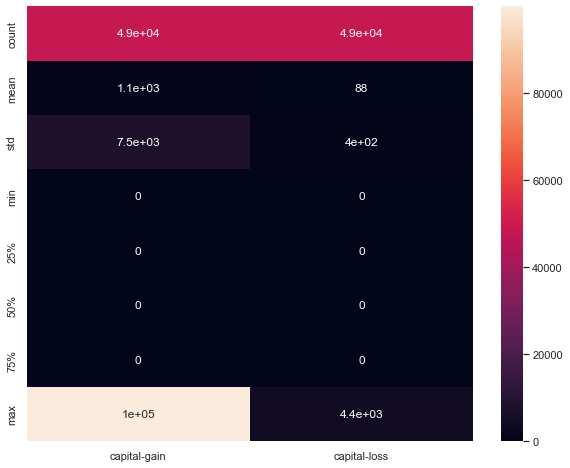

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(describe_capital,annot=True);

### <font color="red"><b>La variable "hours-per-week"</b> </font> ###
<font color="white">La variable <font color="yellow">"hours-per-week"</font> présente une bonne variabilité, 
ce qui implique que <font color="yellow">"hours-per-week"</font> sera un bon prédicteur du <font color="yellow">"income"</font>.</font>

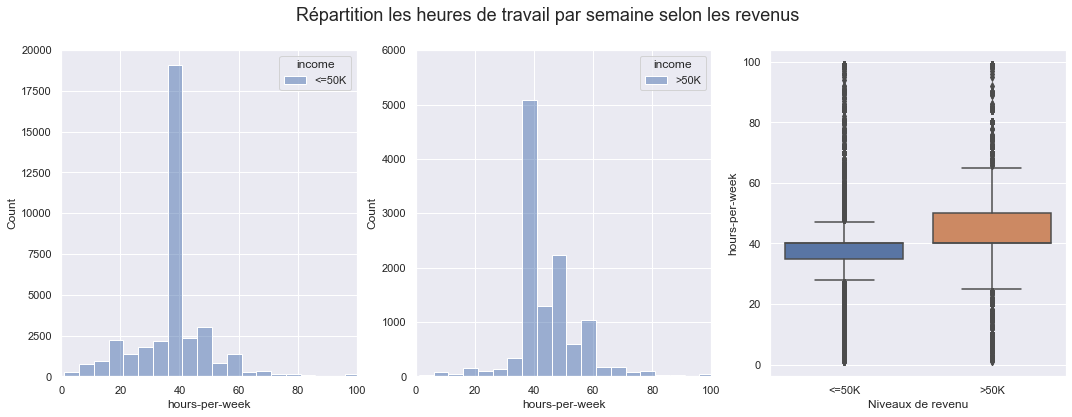

In [169]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(18,6))
fig.suptitle("Répartition les heures de travail par semaine selon les revenus",fontsize=18)
ax1= plt.subplot(1,3, 1)
ax1.set_xlim(0,100)
ax1.set_ylim(0,20000)
ax1 = sns.histplot(data=df[revenuEndessous50K], x="hours-per-week",hue="income", 
                   binwidth=5,legend=True)

ax2 = plt.subplot(1,3, 2)
ax2.set_xlim(0,100)
ax2.set_ylim(0,6000)
ax2 = sns.histplot(data=df[revenuAudessus50K], x="hours-per-week",hue="income", 
                   binwidth=5)

ax3 = plt.subplot(1,3, 3)
ax3 = sns.boxplot(data=df, x="income",y="hours-per-week")
ax3.set_xlabel("Niveaux de revenu")
ax3.set_ylabel("hours-per-week")

plt.show()



## <font color="red"><b>_Les variable Catégorielles_</b></font> ##
1. ### **Gender**: ###
> La parité salariale est un thème qui fait référence aux inégalités de salaires constatés entre les hommes et les femmes dans le domaine professionnel.
> Une partie des inégalités de rémunération peut s’expliquer par une plus grande proportion de femmes en temps partiel ou par l’occupation d’emplois moins valorisés.
> La question qu'on pose est ce que le genre est un prédicteur du revenu?
> Vu les résultats ci-dessous la variable gender n'est pas un bon prédicteur, pour prédir le revenu. Cette variable ne sera pas utilisée pour le modèle.


In [22]:
incomPerGender = df.pivot_table(columns="income",index="gender",aggfunc="count").iloc[:,:2]
incomPerGender.rename({"age":"income"}, axis=1)

income      
income  <=50K  >50K
gender             
Female  14423  1769
Male    22732  9918

### **2. workclass** ###

In [23]:
workclassIcome =  df.pivot_table(columns="workclass", index="income",aggfunc="count")["age"]
workclassIcome

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,,,
<=50K,2534.0,871.0,2209.0,10.0,26519.0,757.0,2785.0,1451.0,19.0
>50K,265.0,561.0,927.0,NaN,7387.0,938.0,1077.0,530.0,2.0


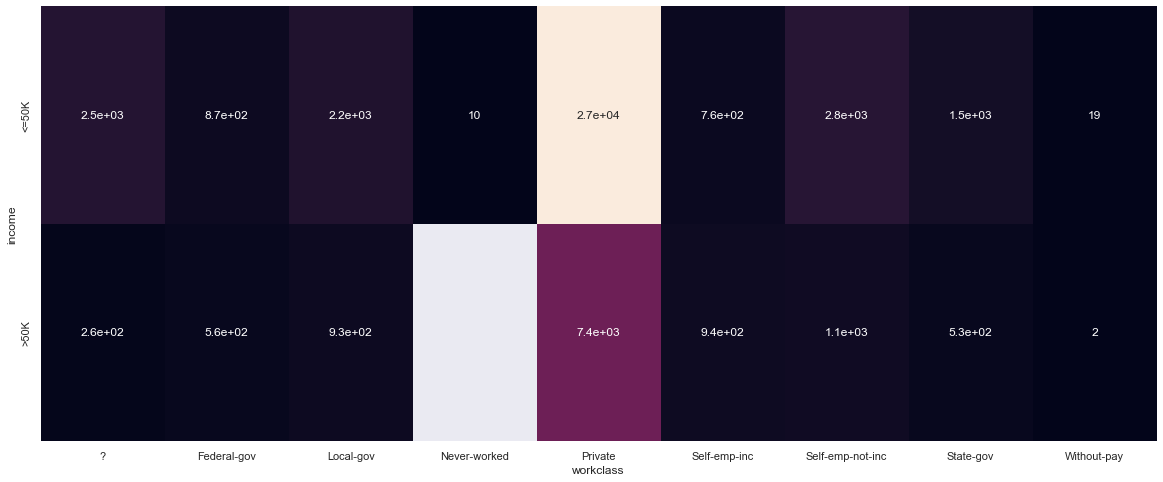

In [27]:
plt.figure(figsize=(20,8))
sns.heatmap(workclassIcome, annot=True, cbar=False );

### 3. **Occupation** ###

In [24]:
occupationIcome =  df.pivot_table(columns="occupation", index="income",aggfunc="count")["age"]
occupationIcome 

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
income,,,,,,,,,,,,,,,
<=50K,2544,4843,10,4729,3178,1317,1934,2650,4719,239,3388,675,4029,1026,1874
>50K,265,768,5,1383,2908,173,138,372,204,3,2784,308,1475,420,481


In [29]:
maritalStatusIcome =  df.pivot_table(columns="marital-status", index="income",aggfunc="count")["age"]
maritalStatusIcome

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
income,,,,,,,
<=50K,5962,23,12395,570,15384,1431,1390
>50K,671,14,9984,58,733,99,128


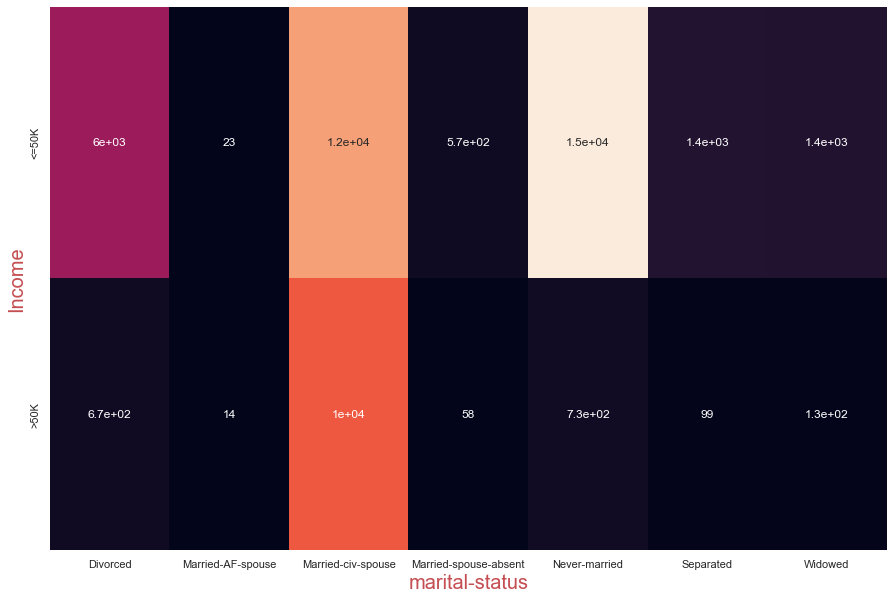

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(maritalStatusIcome, annot=True, cbar=False)
plt.xlabel("marital-status",fontsize=20, color="r")
plt.ylabel("Income",fontsize=20, c='r');

### <font color="red"> Présentation graphique des variables catégorielles</font> ###
> Les graphiques présentent les variations des revenus par rapport à des critères sociaux.
> Les variables workclass, education, marital-status, occupation, relationship, montrent toutes une bonne prévisibilité de la variable income.

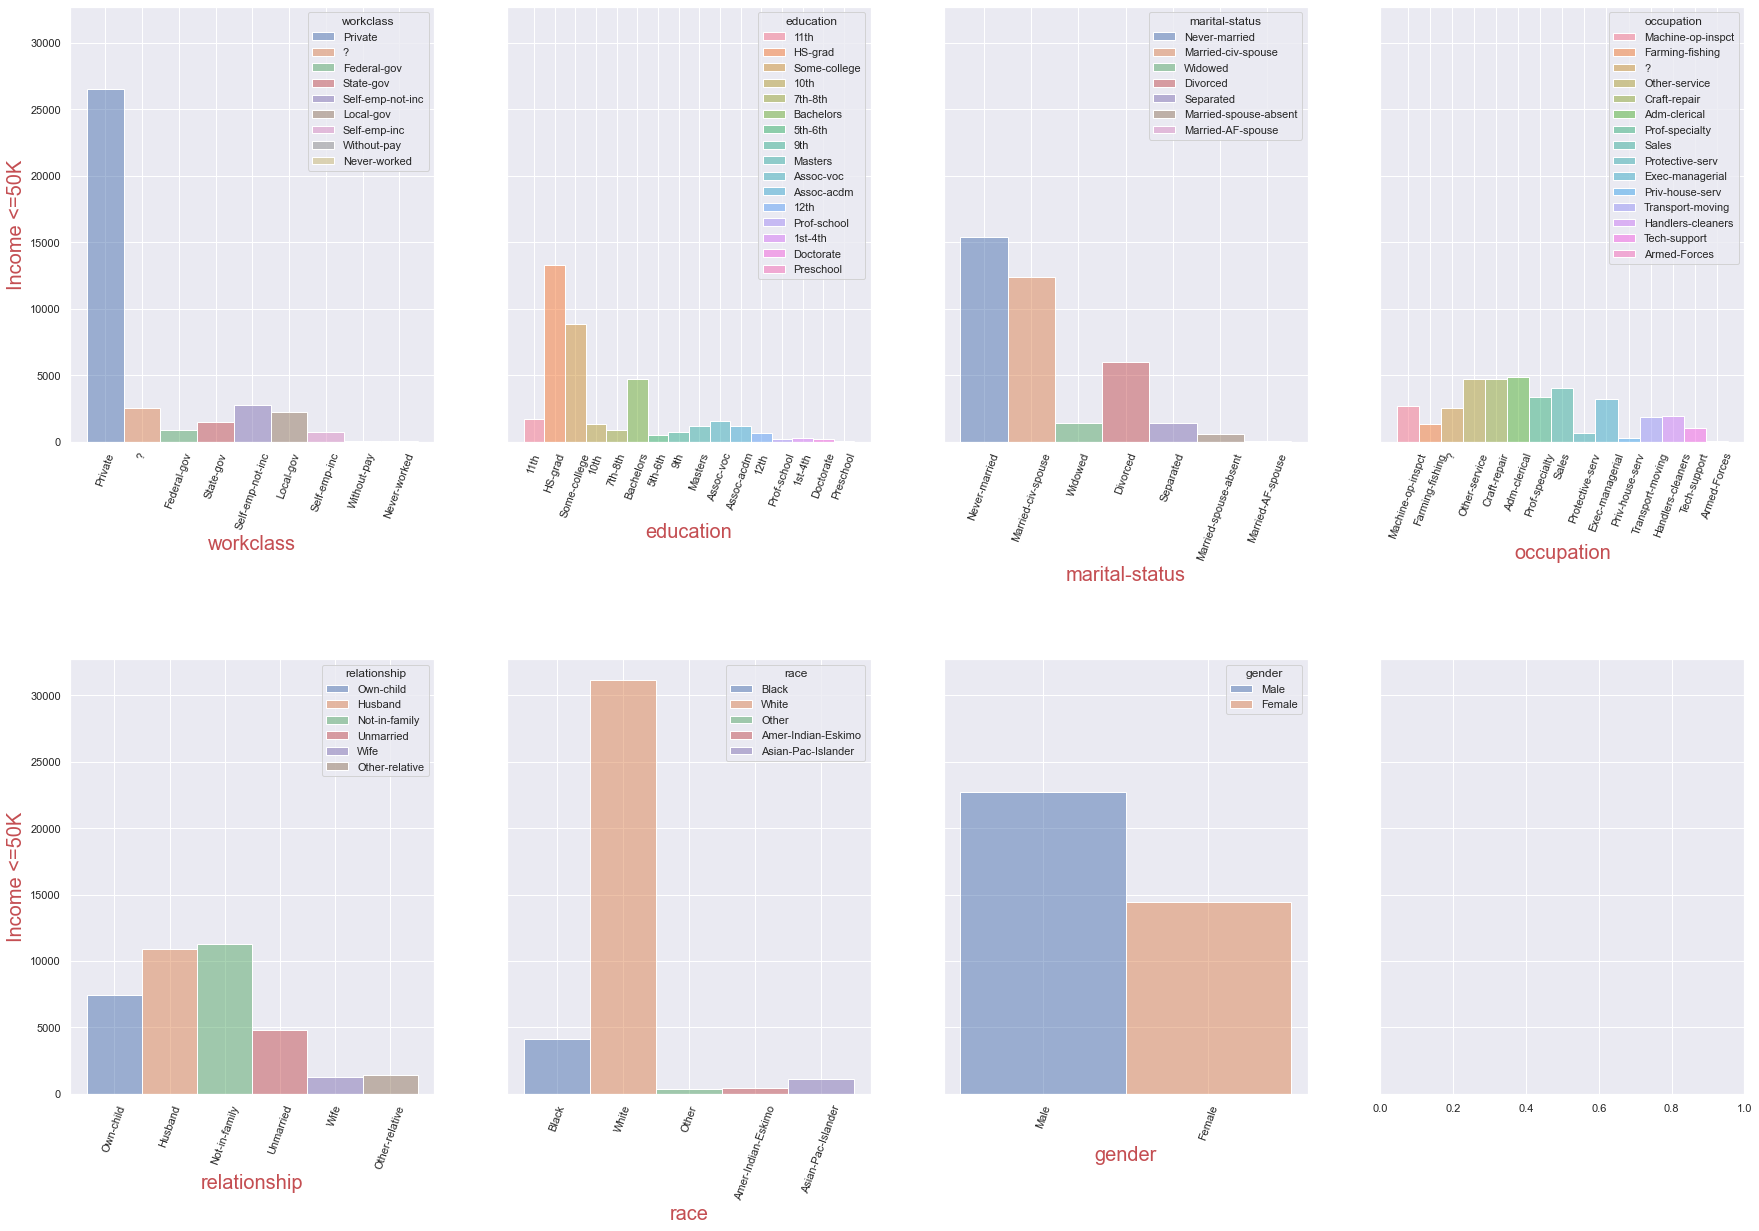

In [25]:
fig, ax= plt.subplots(2,4,figsize=(30,20), sharey=True)
plt.subplots_adjust(hspace=0.5)
for i in range(7):
    ax = plt.subplot(2,4,i+1)
    ax= sns.histplot(data=df[revenuEndessous50K], x=categorCol[i], fill="income", hue=categorCol[i])
    plt.xticks(rotation=70)
    ax.set_xlabel(categorCol[i],fontsize=20,color="r")
    ax.set_ylabel("Income <=50K",fontsize=20, color="r");

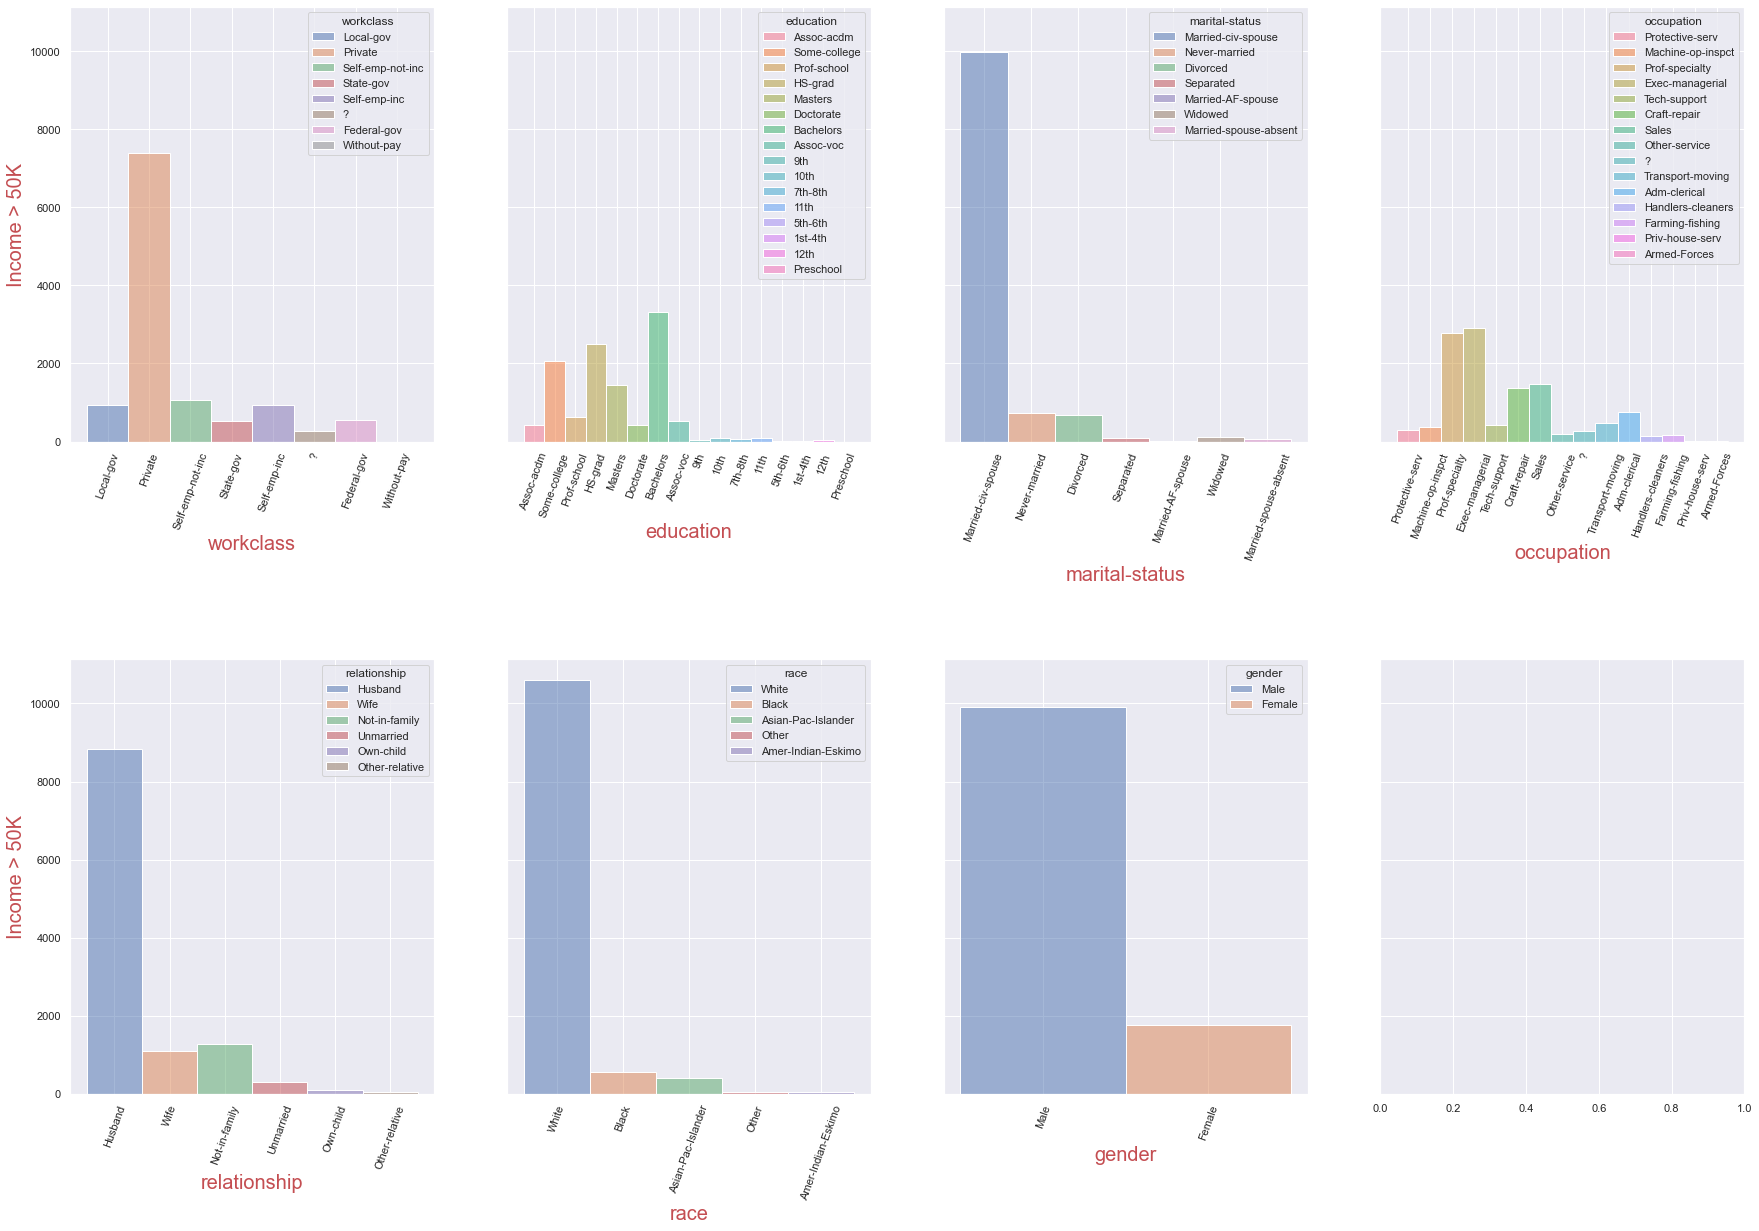

In [32]:
fig, ax= plt.subplots(2,4,figsize=(30,20), sharey=True)
plt.subplots_adjust(hspace=0.5)
for i in range(7):
    ax = plt.subplot(2,4,i+1)
    ax= sns.histplot(data=df[revenuAudessus50K], x=categorCol[i], fill="income", hue=categorCol[i])
    plt.xticks(rotation=70)
    
    ax.set_xlabel(categorCol[i],fontsize=20,color="r")
    ax.set_ylabel("Income > 50K",fontsize=20, color="r");

##  <font color="yellow"> Gestion des variables catégoriques </font>

##### Identification les variables catégoriques et les transformer de sorte à pouvoir les utiliser ensuite dans notre modèle

In [33]:
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


In [26]:
categorCol.remove("native-country")

In [27]:
categorCol.remove("income")

In [28]:
df = pd.get_dummies(df, columns=categorCol)

# <font color="yellow"> Dévision de la dataframe en train et test<font> #

In [29]:
df.shape

(48842, 66)

In [30]:
#importation de la librairie scikit-learn et le methode train_test_split
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.3333, random_state=42)
print(f"La taille train data: {train.shape}, \nLa taille de teste data: {test.shape}")

La taille train data: (32562, 66), 
La taille de teste data: (16280, 66)


In [31]:
#Création les features train et test
X_train = train.drop("income", axis=1)
X_test = test.drop("income", axis=1)

In [32]:
#création des labels train et test
y_train = train["income"]
y_test = test["income"]

In [33]:
y_train = pd.get_dummies(y_train, columns=['income'], drop_first=True)

In [34]:
y_test = pd.get_dummies(y_test, columns=['income'], drop_first=True)

In [35]:
y_test.rename({">50K":"income"}, axis=1)

,income
7762,0
23881,0
30507,1
28911,0
19484,0
...,...
42991,1
10127,1
7057,0
17612,0


In [36]:
y_train.rename({">50K":"income"}, axis=1)

,income
42643,0
22206,1
29337,1
13632,0
48423,0
...,...
11284,0
44732,0
38158,0
860,0


In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score,mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [38]:
sc_std = StandardScaler()
train_std = sc_std.fit_transform(X_train)
test_std = sc_std.transform(X_test)

In [39]:
sc_rob = RobustScaler()
train_rob = sc_rob.fit_transform(X_train)
test_rob = sc_rob.transform(X_test)

In [40]:
#Définir les paramètre
param_grid_Knn = {
    'n_neighbors':np.arange(10,31),
    'metric':['euclidean','manhattan']
}
grid_Knn_std = GridSearchCV(KNeighborsClassifier(), param_grid_Knn,n_jobs=6,
                        scoring='accuracy',
                        cv=StratifiedKFold(n_splits=4, shuffle=True))

grid_Knn_rb = GridSearchCV(KNeighborsClassifier(), param_grid_Knn,n_jobs=6,
                        scoring='accuracy',
                        cv=StratifiedKFold(n_splits=4, shuffle=True))

In [41]:
# defining parameter range
#la grille de paramètres prend un dictionnaire contenant la liste des valeurs de chaque hyperparamètre
param_grid_svm = {'C':[0.001, 0.01, 0.05, 0.1 ,0.5, 1, 10], 
'kernel': ['rbf','linear']} 

In [42]:
#instanciation du modèle GridSearchCV
grid_svm_std = GridSearchCV(SVC(),param_grid_svm,n_jobs=6,
                        scoring='accuracy',
                        cv=4)

In [43]:
#La méthode fit prendra comme vecteurs d'argument (train_std, y_train ) c'est deux derniers sont standardizés avec StandarScaler 
grid_Knn_std.fit(train_std, y_train.values.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30])},
             scoring='accuracy')

In [44]:
##La méthode fit prendra comme vecteurs d'argument (train_std, y_train ) c'est deux derniers sont standardizés avec RobustScaler 
grid_Knn_rb.fit(train_rob, y_train.values.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30])},
             scoring='accuracy')

#### On fait la même chose pour le svm stadardise avec StandarScler et robustScaler

In [45]:
#StandarScaler
grid_svm_std.fit(train_std, y_train.values.ravel())

GridSearchCV(cv=4, estimator=SVC(), n_jobs=6,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [47]:
print("Le meilleur modèle KNeighborsClassifier avec standarScaler: ",grid_Knn_std.best_estimator_,
"\nLe meilleur modèle KNeighborsClassifier avec Robustscaler: ",grid_Knn_rb.best_estimator_,
 "\nLe meilleur modèle pour SVM: ", grid_svm_std.best_estimator_)

Le meilleur modèle KNeighborsClassifier avec standarScaler:  KNeighborsClassifier(metric='manhattan', n_neighbors=25) 
Le meilleur modèle KNeighborsClassifier avec Robustscaler:  KNeighborsClassifier(metric='euclidean', n_neighbors=22) 
Le meilleur modèle pour SVM:  SVC(C=1)


In [49]:
print("Le meilleur score KNeighborsClassifier: ",grid_Knn_std.best_score_,
        "\nLe meilleur score KNeighborsClassifier: ",grid_Knn_rb.best_score_,
        "\nLe meilleur score KNeighborsClassifier: ",grid_svm_std.best_score_ )

Le meilleur score KNeighborsClassifier:  0.833364175389111 
Le meilleur score KNeighborsClassifier:  0.8632454871706806 
Le meilleur score KNeighborsClassifier:  0.8501626771940615


## instantiation des modèles

In [51]:
model_lgR = LogisticRegression(solver ='saga', penalty='l2',random_state=0, n_jobs=-1,max_iter=10000)
model_DcTree = DecisionTreeClassifier(random_state=0)
model_Knn_std = KNeighborsClassifier(metric='manhattan', n_neighbors=25, n_jobs=-1)
model_Knn_rb = KNeighborsClassifier(metric='euclidean', n_neighbors=22, n_jobs=-1)
model_svm = SVC(C=1)
model_RF = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=15)

In [52]:
print("Le score de tous les modèles avec standarScaler")
model_std=[]
for model in (model_lgR, model_DcTree,model_Knn_std,model_svm,model_RF):
    model.fit(train_std, y_train.values.ravel())
    model_std.append(model)
    print(model.__class__.__name__, model.score(test_std, y_test))

Le score de tous les modèles avec standarScaler
LogisticRegression 0.8554668304668305
DecisionTreeClassifier 0.8256142506142506
KNeighborsClassifier 0.8425675675675676
SVC 0.8542997542997544
RandomForestClassifier 0.8680589680589681


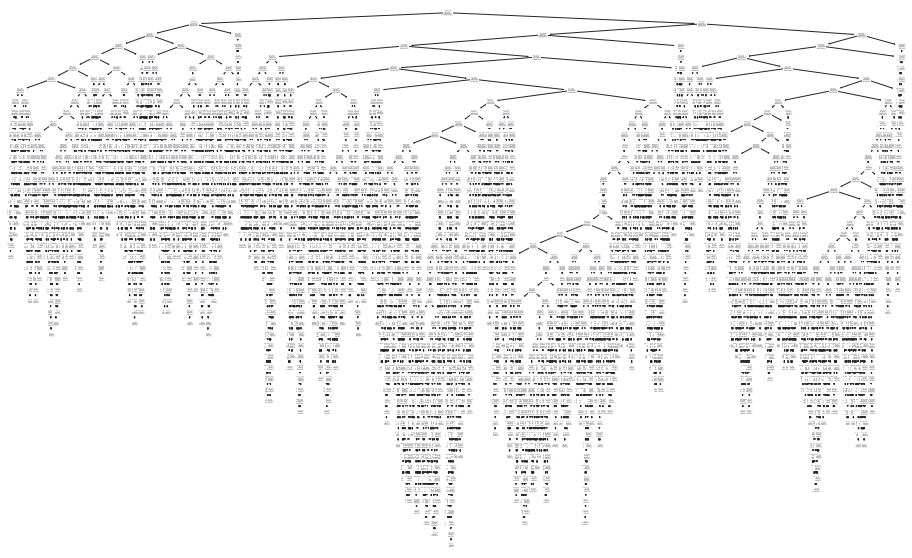

In [53]:
from sklearn import tree
# on peut afficher l'arbre avec plot_tree
plt.figure(figsize=(16,10))
tree.plot_tree(model_std[1]);

In [54]:
print("Le score de tous les modèles avec RobustScaler")
model_rb=[]
for model in (model_lgR, model_DcTree, model_Knn_rb,model_RF):
    model.fit(train_rob, y_train.values.ravel())
    model_rb.append(model)
    print(model.__class__.__name__, model.score(test_std, y_test))

Le score de tous les modèles avec RobustScaler
LogisticRegression 0.76492628992629
DecisionTreeClassifier 0.7827395577395577
KNeighborsClassifier 0.8331695331695331
RandomForestClassifier 0.8339680589680589


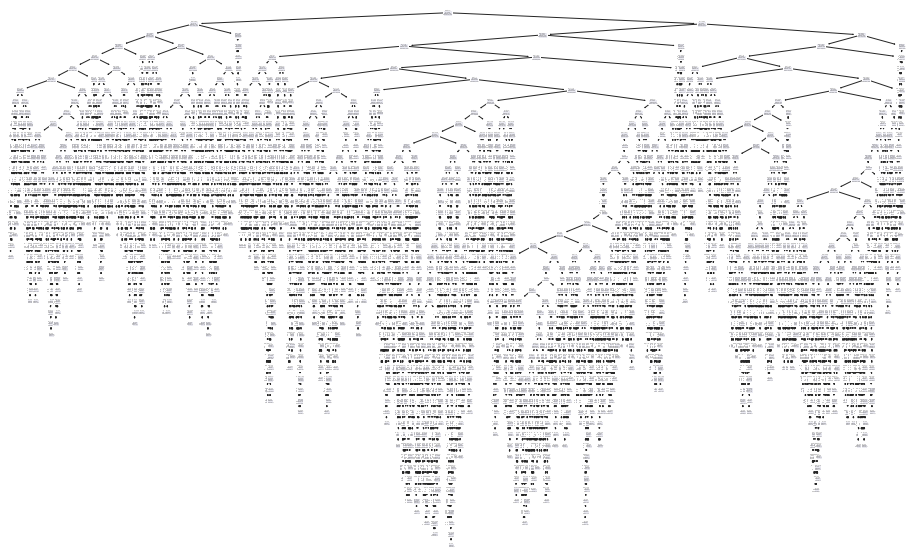

In [55]:
from sklearn import tree
# on peut afficher l'arbre avec plot_tree
plt.figure(figsize=(16,10))
tree.plot_tree(model_rb[1]);

In [104]:
# Prédictions sur le test set standarScaler
y_pred_std = []
for model_pred in model_std:
    y_pred_std.append(model_pred.predict(test_std))


In [105]:
# Prédictions sur le test set standarScaler
y_pred_rb = []
for model_pred in model_rb:
    y_pred_rb.append(model_pred.predict(test_rob))

In [106]:
# Accuracy score y predict standarScalerform
from sklearn.metrics import accuracy_score
for pred in y_pred_std:
    print(f"{accuracy_score(y_test,pred)=}")


accuracy_score(y_test,pred)=0.76492628992629
accuracy_score(y_test,pred)=0.7827395577395577
accuracy_score(y_test,pred)=0.8425675675675676
accuracy_score(y_test,pred)=0.8542997542997544
accuracy_score(y_test,pred)=0.8339680589680589


In [107]:
# Accuracy score y predict RobustScalerfrom 
for pred in y_pred_rb:
    print(accuracy_score(y_test,pred))

0.7754914004914005
0.8251228501228501
0.869963144963145
0.8693488943488944


In [108]:
# Classification report
from sklearn.metrics import classification_report
for pred in y_pred_std:
    print(classification_report(y_test,pred),"\n" )
    print("**********************************************************")

              precision    recall  f1-score   support

           0       0.90      0.78      0.83     12440
           1       0.50      0.72      0.59      3840

    accuracy                           0.76     16280
   macro avg       0.70      0.75      0.71     16280
weighted avg       0.81      0.76      0.78     16280
 

**********************************************************
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     12440
           1       0.55      0.45      0.49      3840

    accuracy                           0.78     16280
   macro avg       0.69      0.67      0.68     16280
weighted avg       0.77      0.78      0.77     16280
 

**********************************************************
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12440
           1       0.71      0.57      0.63      3840

    accuracy                           0.84     16280
   mac

In [110]:
for pred in y_pred_rb:
    print(classification_report(y_test,pred) ,"\n" )
    print("**********************************************************")

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     12440
           1       0.53      0.49      0.51      3840

    accuracy                           0.78     16280
   macro avg       0.69      0.68      0.68     16280
weighted avg       0.77      0.78      0.77     16280
 

**********************************************************
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     12440
           1       0.63      0.63      0.63      3840

    accuracy                           0.83     16280
   macro avg       0.76      0.76      0.76     16280
weighted avg       0.83      0.83      0.83     16280
 

**********************************************************
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12440
           1       0.77      0.65      0.70      3840

    accuracy                           0.87     16280
   mac

In [111]:
from sklearn.metrics import roc_curve, auc
for pred in y_pred_std:
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print(f"{roc_auc=}")

roc_auc=0.7509453711146838
roc_auc=0.6665548800911039
roc_auc=0.747830000669882
roc_auc=0.7601876507234727
roc_auc=0.6930545786441586


In [112]:
for pred in y_pred_rb:
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print(f"{roc_auc}")

0.6769347032422294
0.758378969051447
0.7927606678724544
0.7773261655948552


In [113]:
# Matrice de confusion standarScalerform
from sklearn.metrics import confusion_matrix
for pred in y_pred_std:
    print(confusion_matrix(y_test, pred))

[[9671 2769]
 [1058 2782]]
[[11028  1412]
 [ 2125  1715]]
[[11534   906]
 [ 1657  2183]]
[[11673   767]
 [ 1605  2235]]
[[11940   500]
 [ 2203  1637]]


In [114]:
# Matrice de confusion RobustScalerfrom
for pred in y_pred_rb:
    print(confusion_matrix(y_test, pred))

[[10742  1698]
 [ 1957  1883]]
[[11006  1434]
 [ 1413  2427]]
[[11680   760]
 [ 1357  2483]]
[[11837   603]
 [ 1524  2316]]


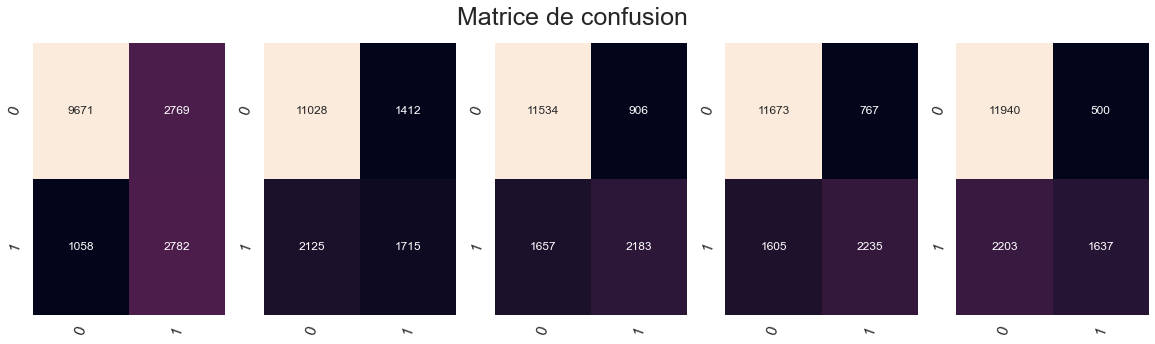

In [167]:
fig, ax = plt.subplots(1,5, figsize=(20,5))
fig.suptitle('Matrice de confusion StandarScaler', fontsize=25)
for i in range(len(y_pred_std)):
    ax = plt.subplot(1,5, i+1)
    ax = sns.heatmap(confusion_matrix(y_test, y_pred_std[i]), annot=True, fmt="d", cbar=False)
    plt.xticks(rotation=70, fontsize=15)
    plt.yticks(rotation=70, fontsize=15)
    
    

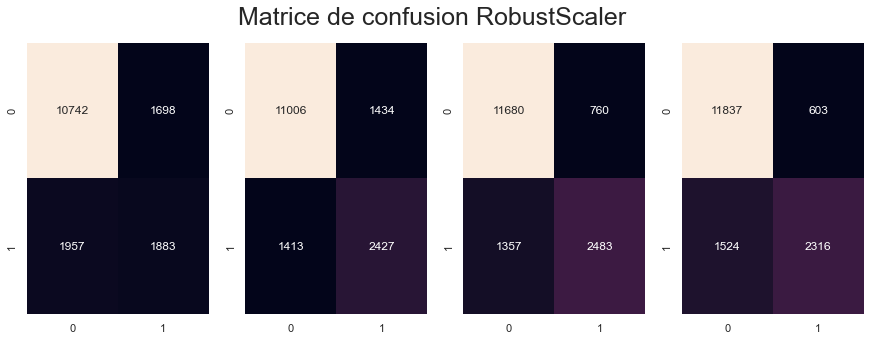

In [168]:
fig, ax = plt.subplots(1,5, figsize=(15,5))
fig.suptitle('Matrice de confusion RobustScaler', fontsize=25)
for i in range(len(y_pred_rb)):
    ax = plt.subplot(1,4, i+1)
    ax = sns.heatmap(confusion_matrix(y_test, y_pred_rb[i]), annot=True, fmt="d", cbar=False)

In [123]:
# Coefficients
coef = pd.DataFrame(np.concatenate([model_lgR.intercept_.reshape(-1,1), model_std[0].coef_],axis=1),
             index = ["Coefficients"],
             columns = ["constante"]+list(X_train.columns)).T

coef["OR"] = np.exp(coef.Coefficients)
coef["1/OR"] = np.exp(-coef.Coefficients)
coef

,Coefficients,OR,1/OR
constante,-0.017016,0.983127,1.017162
age,0.002309,1.002312,0.997694
educational-num,0.006281,1.006301,0.993739
capital-gain,0.000150,1.000150,0.999850
capital-loss,0.000060,1.000060,0.999940
...,...,...,...
race_Black,-0.002242,0.997761,1.002244
race_Other,-0.000187,0.999813,1.000187
race_White,0.003109,1.003114,0.996896
gender_Female,-0.008120,0.991913,1.008153


In [124]:
coef = pd.DataFrame(np.concatenate([model_lgR.intercept_.reshape(-1,1), model_rb[0].coef_],axis=1),
             index = ["Coefficients"],
             columns = ["constante"]+list(X_train.columns)).T

coef["OR"] = np.exp(coef.Coefficients)
coef["1/OR"] = np.exp(-coef.Coefficients)
coef

,Coefficients,OR,1/OR
constante,-0.017016,0.983127,1.017162
age,0.002309,1.002312,0.997694
educational-num,0.006281,1.006301,0.993739
capital-gain,0.000150,1.000150,0.999850
capital-loss,0.000060,1.000060,0.999940
...,...,...,...
race_Black,-0.002242,0.997761,1.002244
race_Other,-0.000187,0.999813,1.000187
race_White,0.003109,1.003114,0.996896
gender_Female,-0.008120,0.991913,1.008153


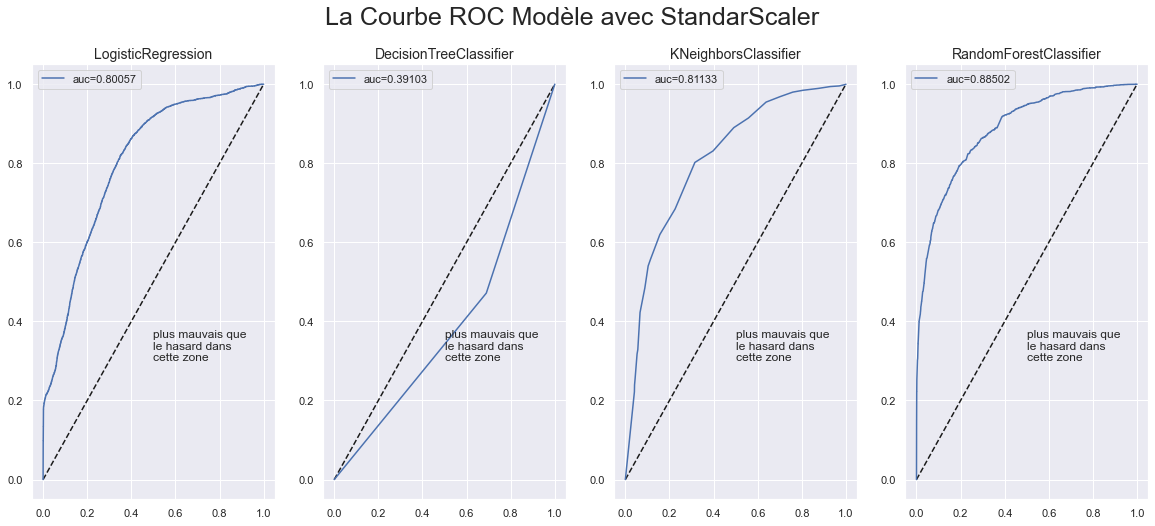

In [163]:
# Courbe ROC
from sklearn.metrics import roc_curve, auc
fig, ax = plt.subplots(1,4, figsize=(20,8))
fig.suptitle('La Courbe ROC Modèle avec StandarScaler', fontsize=25)
j=0
for i in range(len(model_std)):
    if i!= 3:
        j+=1
        proba = model_std[i].predict_proba(X_test.values)
        fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1], pos_label=1, drop_intermediate=False)
        ax = plt.subplot(1,4, j)
        ax.plot([0, 1], [0, 1], 'k--')
        aucf = auc(fpr, tpr)  
        ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
        ax.set_title(f"{model_std[i].__class__.__name__}",fontsize=14)
        ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
        ax.legend();
        

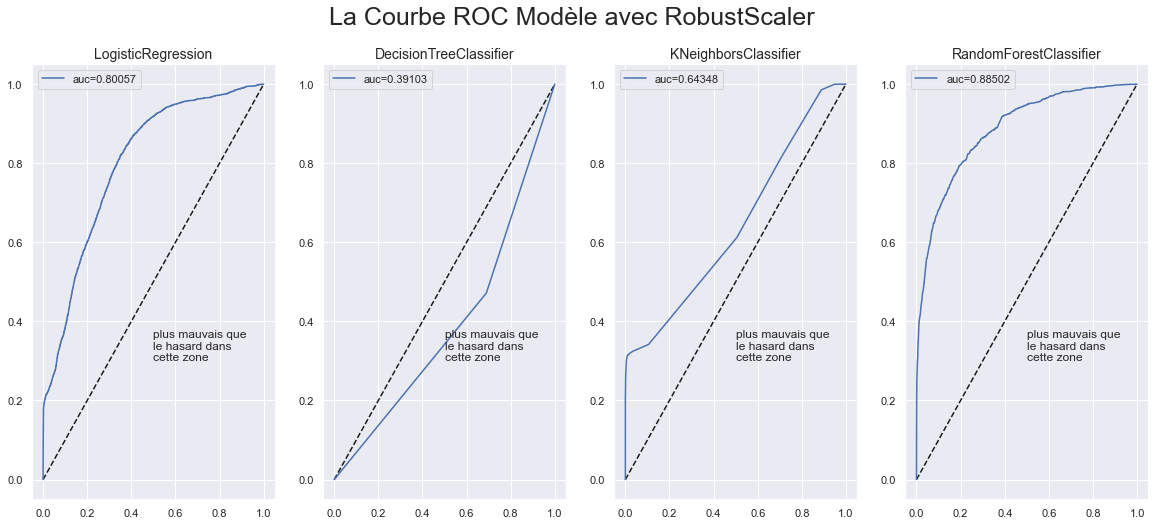

In [165]:
# Courbe ROC
from sklearn.metrics import roc_curve, auc
fig, ax = plt.subplots(1,4, figsize=(20,8))
fig.suptitle('La Courbe ROC Modèle avec RobustScaler', fontsize=25)
for i in range(len(model_rb)):
    proba = model_rb[i].predict_proba(X_test.values)
    fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1], pos_label=1, drop_intermediate=False)

    ax = plt.subplot(1,4, i+1)
    ax.plot([0, 1], [0, 1], 'k--')
    aucf = auc(fpr, tpr)  
    ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
    ax.set_title(f"{model_rb[i].__class__.__name__}",fontsize=14)
    ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
    ax.legend();